Przewidywanie ceny domów. Celem projektu jest zastosowanie modeli regresji do przewidzenia ceny
domu o podanych cechach.
Dokładny opis danych: http://web.stanford.edu/class/stats191/data/amesdoc.txt
Zmienna celu (cena domu): SalePrice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
#read_data

df = pd.read_csv("ames2000_NAfix.csv")

In [3]:
#uzupelnianie brakow
df.fillna(method='ffill', inplace=True)

In [4]:
#kodowanie nazw na liczby
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,11,5,54,86,1,1,3,3,0,4,...,0,3,4,1,0,7,1,6,5,480
1,0,5,90,456,1,1,3,3,0,0,...,0,3,2,1,0,3,4,9,4,190
2,9,5,80,280,1,1,3,3,0,4,...,0,3,2,1,0,3,3,9,4,218
3,10,5,84,255,1,1,3,0,0,4,...,0,3,4,1,0,5,3,9,2,156
4,5,5,11,1298,1,1,3,3,0,0,...,0,3,4,1,0,8,0,6,5,738
5,0,5,70,111,1,1,0,3,0,4,...,0,3,4,1,0,8,3,9,4,67
6,0,5,38,1358,1,1,0,2,0,4,...,0,3,4,1,0,4,1,9,4,659
7,0,6,80,280,1,0,3,3,0,4,...,0,3,4,1,0,7,0,0,4,105
8,0,5,90,577,1,1,3,3,0,4,...,0,3,4,1,0,8,0,9,4,567
9,6,1,120,219,1,1,0,3,0,4,...,0,3,4,1,0,2,4,9,0,77


In [5]:
df.columns

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street',
       'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built',
       'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st',
       'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual',
       'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu',
       'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Ga

In [6]:
#feature selecting

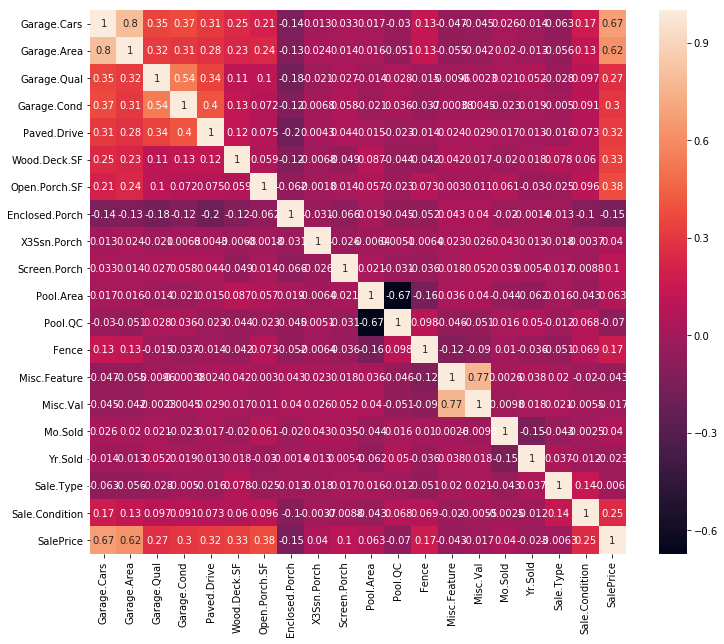

In [7]:
#korelacja persona
#pokazuje ostatnie 20-kolumn do dla wszystkich zmiennych wykres nie jest czytelny
plt.figure(figsize=(12,10))
cor = df[df.columns[60:]].corr()
sns.heatmap(cor, annot=True)
plt.show()

In [8]:
#Wybieram zmienne ktore ze przewidywana maja korelacje wieksza od 0.5
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Overall.Qual      0.829901
Year.Built        0.652579
Year.Remod.Add    0.600790
Exter.Qual        0.617276
Bsmt.Qual         0.603875
X1st.Flr.SF       0.603333
Gr.Liv.Area       0.734032
Full.Bath         0.613332
Kitchen.Qual      0.562749
Fireplaces        0.507568
Garage.Type       0.502907
Garage.Cars       0.672988
Garage.Area       0.622652
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [9]:
feat = [relevant_features.axes[0][i] for i in range(len(relevant_features.axes[0]))]

In [10]:
df=df[feat]

In [11]:
#podzial zmienne przewidujace i przewidywane


y = df['SalePrice'] #Life Time Value
X = df.drop('SalePrice',1)

<Figure size 1440x1440 with 0 Axes>

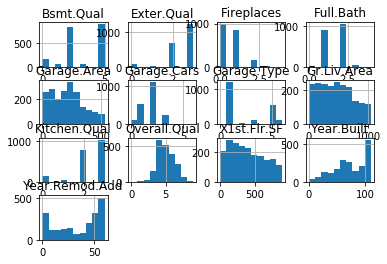

In [12]:
#show histograms
plt.figure(figsize=(20,20))
X.hist()
plt.show()




In [13]:
def reject_outliers(data, m=0.4):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [14]:
#X["Year.Remod.Add"] ta zmienna jest za bardzo skosna, sprobujmy sa chociaz co nieco wyprostowac

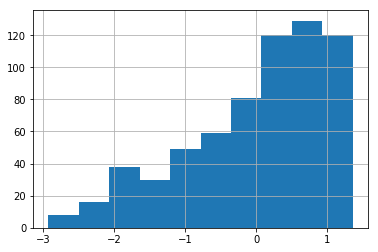

In [15]:
X["Year.Remod.Add"]=X["Year.Remod.Add"]**0.1
X["Year.Remod.Add"]=reject_outliers(X["Year.Remod.Add"])
X["Year.Remod.Add"]=(X["Year.Remod.Add"]-X["Year.Remod.Add"].mean())/X["Year.Remod.Add"].std()
X["Year.Remod.Add"].hist()


In [16]:
#zamieniam NA(braki danych na srednia)

X["Year.Remod.Add"]=X["Year.Remod.Add"].fillna(X["Year.Remod.Add"].mean())
X["Year.Remod.Add"]

0       5.684342e-16
1       3.858155e-01
2       5.684342e-16
3       9.960407e-01
4       5.684342e-16
5       5.684342e-16
6       8.143422e-01
7       5.684342e-16
8       5.684342e-16
9       5.684342e-16
10      5.684342e-16
11      1.259531e-01
12      5.684342e-16
13      9.374352e-01
14     -1.790099e-01
15      5.684342e-16
16      5.684342e-16
17      5.684342e-16
18      5.684342e-16
19      5.684342e-16
20     -2.010577e+00
21      5.684342e-16
22      5.684342e-16
23      5.684342e-16
24     -8.513243e-01
25      5.684342e-16
26      8.769147e-01
27      5.684342e-16
28      8.143422e-01
29      5.684342e-16
            ...     
1970    8.769147e-01
1971    5.684342e-16
1972    5.684342e-16
1973    5.684342e-16
1974    7.495651e-01
1975    5.684342e-16
1976    5.684342e-16
1977    5.684342e-16
1978    5.684342e-16
1979    5.684342e-16
1980    5.684342e-16
1981    5.684342e-16
1982   -8.513243e-01
1983    5.684342e-16
1984   -4.169545e-01
1985    5.684342e-16
1986   -2.929

In [17]:
from sklearn.model_selection import train_test_split

#podzial zbior na testowy i traningowy
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=100)

Wyniki dla drzewa decyzyjnego
MAE 74.235
MSE 10378.981666666667
RMSE 101.87728729538624
Wyniki dla regresji liniowej
MAE 54.44529531758794
MSE 5175.295726421659
RMSE 71.93952826104477
R2 0.8710958838317633


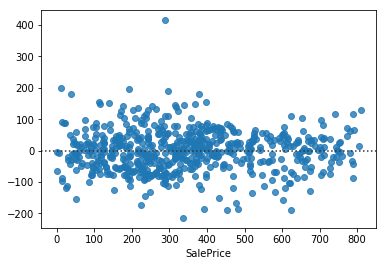

In [18]:
#drzewo decyzyjne
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(train_X, train_y)
predictions = clf.predict(test_X)



from sklearn import metrics


# calculate MAE, MSE, RMSE
print("Wyniki dla drzewa decyzyjnego")
print("MAE",metrics.mean_absolute_error(test_y, predictions))
print("MSE",metrics.mean_squared_error(test_y, predictions))
print("RMSE",np.sqrt(metrics.mean_squared_error(test_y, predictions)))


#regresja liniowa

from sklearn import linear_model

clf = linear_model.LinearRegression()

clf = clf.fit(train_X, train_y)
predictions = clf.predict(test_X)


print("Wyniki dla regresji liniowej")
print("MAE",metrics.mean_absolute_error(test_y, predictions))
print("MSE",metrics.mean_squared_error(test_y, predictions))
print("RMSE",np.sqrt(metrics.mean_squared_error(test_y, predictions)))
print("R2", clf.score(X,y))


#wykres residuum
sns.residplot(test_y, predictions)


In [19]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [20]:
import xgboost as xgb
#clf = xgb.XGBRegressor(objective="reg:linear", random_state=42)

clf = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [21]:
clf = clf.fit(train_X, train_y)
predictions = clf.predict(test_X)


print("Wyniki dla xboost")
print("MAE",metrics.mean_absolute_error(test_y, predictions))
print("MSE",metrics.mean_squared_error(test_y, predictions))
print("RMSE",np.sqrt(metrics.mean_squared_error(test_y, predictions)))
print("R2", clf.score(X,y))

Wyniki dla xboost
MAE 132.28106654167175
MSE 27187.404804965066
RMSE 164.88603580947984
R2 0.31655053897879193


/Users/macbookssd/miniconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


['Exter.Qual', 'Overall.Qual', 'Garage.Cars', 'Year.Built', 'Gr.Liv.Area']

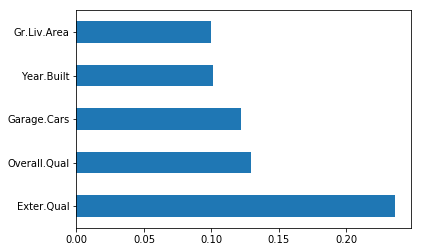

In [22]:
#5 najwazniejszych zmiennych wg klasyfikatora xboost

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

# feat_importances.nlargest(5)

feat = [feat_importances.nlargest(5).axes[0][i] for i in range(len(feat_importances.nlargest(5).axes[0]))]
feat




In [23]:
#zobaczmy co sie stanie jak dodamy pipeliny i gridy

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression

from sklearn import tree

#podzial zbior na testowy i traningowy
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=100)




# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=42))])

pipe_xgb = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', xgb.XGBRegressor(objective="reg:linear", random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', tree.DecisionTreeClassifier(random_state=42))])

pipe_lin= Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', linear_model.LinearRegression())])






pipelines = [pipe_lr, pipe_xgb, pipe_dt, pipe_lin]

pipe_dict = {0: 'Logistic Regression', 1: 'xboost', 2: 'Decision Tree', 3:'Linear Regression'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(train_X, train_y)

# Compare accuracies
for idx, val in enumerate(pipelines):
	print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(test_X, test_y)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(test_X, test_y) > best_acc:
		best_acc = val.score(test_X, test_y)
		best_pipe = val
		best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])


/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/macbookssd/miniconda3/lib/python3.6/site-packag

Logistic Regression pipeline test accuracy: 0.010
xboost pipeline test accuracy: 0.831
Decision Tree pipeline test accuracy: 0.003
Linear Regression pipeline test accuracy: 0.831
Classifier with best accuracy: Linear Regression


/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: Dat

In [25]:
#dostrajanie modeli
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
params = {
	'learning_rate':[0.01, 0.05],
    'n_estimators': [100, 200],
    'max_features': [0.1, 0.2, 0.5],
    'max_depth': [2,3,4],
    'min_samples_leaf': [2, 5, 10],
    'verbose': [0,1,2],
    'lambda':[2,3,4]
}

clf = xgb.XGBRegressor(objective="reg:linear", random_state=42)
clf = clf.fit(train_X, train_y)
predictions = clf.predict(test_X)


kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state = 100)



# grid = GridSearchCV(clf, param_grid = params, cv=kfold, scoring="accuracy", n_jobs= 10, verbose = 1)
# grid.fit(train_X, train_y)
# grid.cv_results_




/Users/macbookssd/miniconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [26]:
y = df['SalePrice'] #Life Time Value
X = df.drop('SalePrice',1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=100)




print("R2", clf.score(X,y))

MLA = pipelines

pipe_dict = {0: 'Logistic Regression', 1: 'xboost', 2: 'Decision Tree', 3:'Linear Regression'}



MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
for alg in MLA:
    predicted = alg.fit(train_X, train_y).predict(test_X)

    MLA_name = list(pipe_dict.values())[row_index]
    MLA_compare.loc[row_index,' Name'] = MLA_name
    MLA_compare.loc[row_index, 'MAE'] = metrics.mean_absolute_error(predicted, test_y)
    MLA_compare.loc[row_index, 'MSE'] = metrics.mean_squared_error(predicted, test_y)
    MLA_compare.loc[row_index, 'RMSE'] = np.sqrt(metrics.mean_squared_error(predicted, test_y))
    MLA_compare.loc[row_index, 'R2'] = alg.score(X,y)
    
    
    
    
    row_index+=1

MLA_compare.sort_values(by = ['R2'], ascending = False, inplace = True)
MLA_compare

R2 0.9057199772351266


/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/macbookssd/miniconda3/lib/python3.6/site-packages/sklearn/pipelin

,Name,MAE,MSE,RMSE,R2
1,xboost,60.301187,6468.041775,80.424137,0.875372
3,Linear Regression,59.716929,6343.948007,79.648905,0.846220
2,Decision Tree,83.428333,12110.201667,110.046361,0.688500
0,Logistic Regression,93.161667,14165.228333,119.017765,0.019000
